In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline 
np.random.seed(42)

df = pd.read_csv('coffee_dataset.csv')


In [2]:
sample_df = df.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

In [ ]:
# avg of height for coffee-drinker == avg of height for non-drinker?



h0 : mean_y= mean_n(부등호 있는건 무조건 귀무가설로 둔다)

h1 : mean_y != mean_n

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

mean_y< mean_n


h1: mean_y < mean_n\
h0: mean_y >= mean_n

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [5]:
nocoff_means, coff_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = sample_df.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    # append the info 
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)  

In [6]:
np.std(nocoff_means) # the standard deviation of the sampling distribution for nocoff

0.4062103411990494

In [7]:
np.std(coff_means) # the standard deviation of the sampling distribution for coff

0.24162333382854134

In [8]:
np.std(diffs) # the standard deviation for the sampling distribution for difference in means

0.4707845365781659

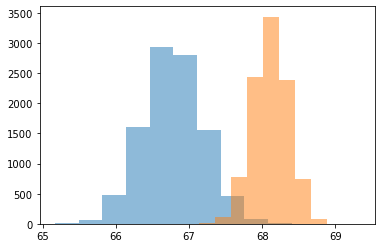

In [9]:
plt.hist(nocoff_means, alpha = 0.5);
plt.hist(coff_means, alpha = 0.5); # They look pretty normal to me!

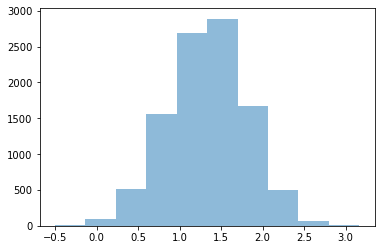

In [10]:
plt.hist(diffs, alpha = 0.5); # again normal - this is by the central limit theorem

`4.` Now, use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were centered on zero.  Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

In [11]:
null_vals = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null

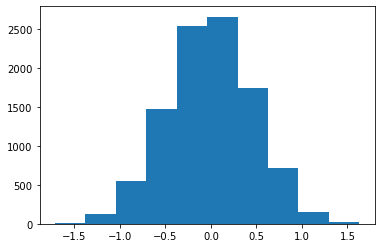

In [12]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null